# Importing necessary libraries

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# Loading training and testing data

In [2]:
exoplanet_data = pd.read_csv('./nasa exoplanet data.csv').fillna(0)

# Data Analysis

In [3]:
exoplanet_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
exoplanet_data.shape

(5087, 3198)

In [5]:
exoplanet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [6]:
exoplanet_data.isnull().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

In [7]:
exoplanet_data['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [8]:
exoplanet_data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


# Data Preprocessing

## Label Encoding of Target Feature

In [9]:
categ = {2: 1, 1: 0}
exoplanet_data.LABEL = [categ[item] for item in exoplanet_data.LABEL]

In [10]:
exoplanet_data['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

<AxesSubplot: xlabel='index'>

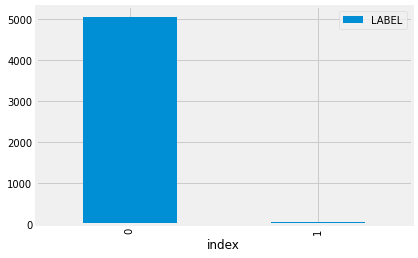

In [11]:
exoplanet_data['LABEL'].value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')

## Handling Missing Values

<AxesSubplot: >

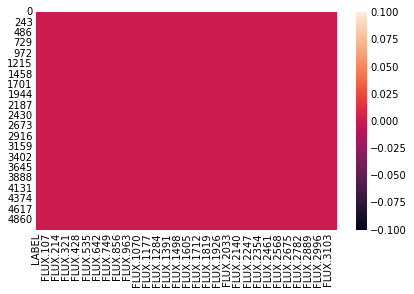

In [12]:
# We can see from the heat map that we dont have any missing values in our dataset
sns.heatmap(exoplanet_data.isnull())

## Outlier Detection and Removal

<AxesSubplot: xlabel='LABEL', ylabel='FLUX.5'>

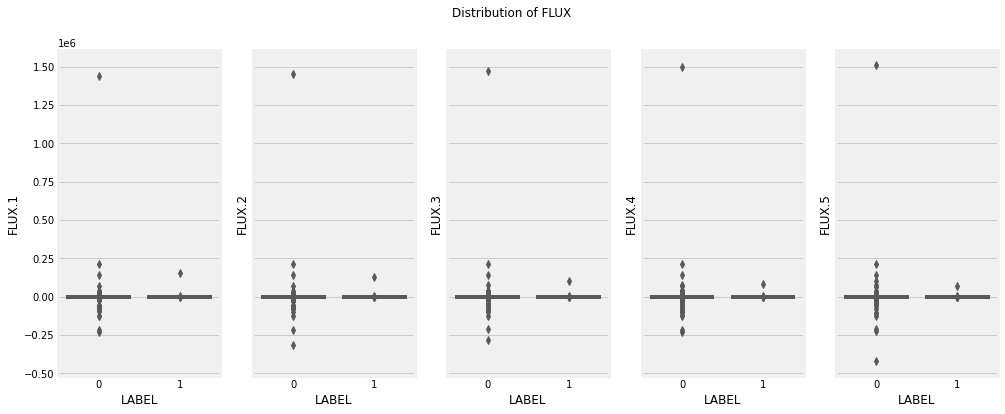

In [13]:
fig, axes = plt.subplots(1, 5,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

sns.boxplot(ax=axes[0], data=exoplanet_data, x='LABEL', y='FLUX.1',palette="Set2")
sns.boxplot(ax=axes[1], data=exoplanet_data, x='LABEL', y='FLUX.2',palette="Set2")
sns.boxplot(ax=axes[2], data=exoplanet_data, x='LABEL', y='FLUX.3',palette="Set2")
sns.boxplot(ax=axes[3], data=exoplanet_data, x='LABEL', y='FLUX.4',palette="Set2")
sns.boxplot(ax=axes[4], data=exoplanet_data, x='LABEL', y='FLUX.5',palette="Set2")

In [14]:
exoplanet_data.drop(exoplanet_data[exoplanet_data['FLUX.1']>250000].index, axis=0, inplace=True)

## Splitting the dataset into Input Features and Output Feature

In [15]:
x_train = exoplanet_data.drop(["LABEL"],axis=1)
y_train = exoplanet_data["LABEL"]

## Data Normalization

In [16]:
x_train = normalized = normalize(x_train)

## Guassian Filters

In [17]:
x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)

## Feature Scaling

In [18]:
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)

## Dimensionality Reduction using PCA (Principal Component Analysis)

In [19]:
from sklearn.decomposition import PCA
pca = PCA() 
x_train = pca.fit_transform(x_train)
x_train = pca.transform(x_train)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1
print(k)

37


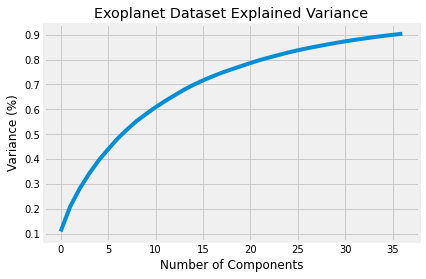

In [20]:
pca = PCA(n_components=37)
x_train = pca.fit_transform(x_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [21]:
x_train.shape

(5086, 37)

## Handling Imbalance using SMOTE (Synthetic Minority Oversampling Technique)

<AxesSubplot: xlabel='index'>

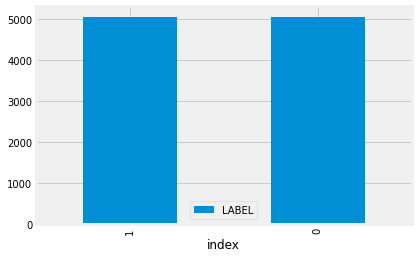

In [22]:
from imblearn.over_sampling import SMOTE
model = SMOTE()
ov_train_x,ov_train_y = model.fit_resample(exoplanet_data.drop('LABEL',axis=1), exoplanet_data['LABEL'])
ov_train_y = ov_train_y.astype('int')

ov_train_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')

## Splitting into Testing Data and Training Data

In [23]:
train_X, test_X, train_y, test_y = train_test_split(ov_train_x, ov_train_y, test_size=0.33, random_state=42)

# Model Building

In [24]:
def model(classifier,dtrain_x,dtrain_y,dtest_x,dtest_y):
    classifier.fit(dtrain_x,dtrain_y)

    prediction=classifier.predict(dtest_x)

    print('Validation accuracy of model is', accuracy_score(prediction,dtest_y))
    print ("\nClassification report :\n",(classification_report(dtest_y,prediction)))

    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)


## Support Vector Machines

Validation accuracy of model is 0.6771677167716772

Classification report :
               precision    recall  f1-score   support

           0       0.61      1.00      0.76      1709
           1       1.00      0.34      0.50      1624

    accuracy                           0.68      3333
   macro avg       0.81      0.67      0.63      3333
weighted avg       0.80      0.68      0.64      3333



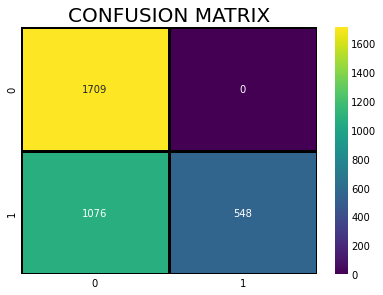

In [25]:
from sklearn.svm import SVC
SVM_model=SVC(C = 10, gamma=0.001)
model(SVM_model,train_X,train_y,test_X,test_y)

## Random Forest Algorithm

Validation accuracy of model is 0.9993999399939995

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1709
           1       1.00      1.00      1.00      1624

    accuracy                           1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



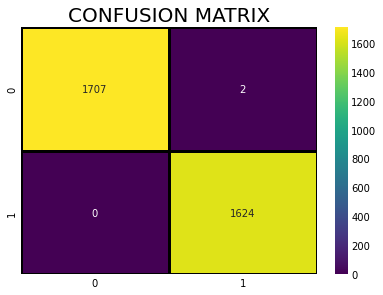

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
model(rf_classifier,train_X,train_y,test_X,test_y)

## K Nearest Neighbors

Validation accuracy of model is 0.9813981398139814

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1709
           1       0.96      1.00      0.98      1624

    accuracy                           0.98      3333
   macro avg       0.98      0.98      0.98      3333
weighted avg       0.98      0.98      0.98      3333



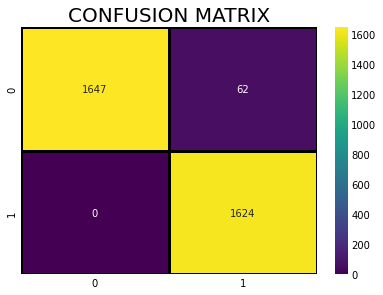

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
model(knn_model,train_X,train_y,test_X,test_y)

## Logistic Regression

Validation accuracy of model is 0.8748874887488749

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.76      0.86      1709
           1       0.80      1.00      0.89      1624

    accuracy                           0.87      3333
   macro avg       0.90      0.88      0.87      3333
weighted avg       0.90      0.87      0.87      3333



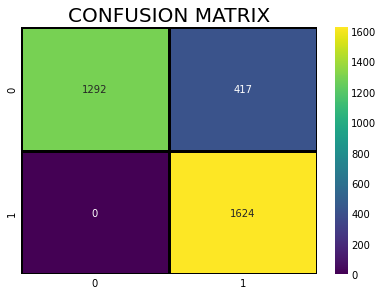

In [28]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
model(lr_model,train_X,train_y,test_X,test_y)

## Decision Tree Algorithm

Validation accuracy of model is 0.9375937593759376

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1709
           1       0.90      0.98      0.94      1624

    accuracy                           0.94      3333
   macro avg       0.94      0.94      0.94      3333
weighted avg       0.94      0.94      0.94      3333



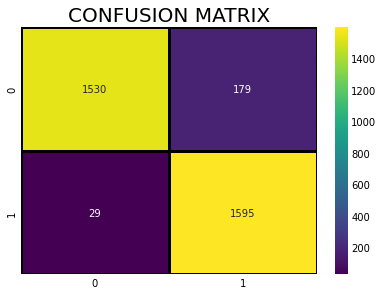

In [29]:
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)
model(ds_model,train_X,train_y,test_X,test_y)

## Bernoulli Naive Bayes

Validation accuracy of model is 0.8232823282328233

Classification report :
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      1709
           1       0.86      0.76      0.81      1624

    accuracy                           0.82      3333
   macro avg       0.83      0.82      0.82      3333
weighted avg       0.83      0.82      0.82      3333



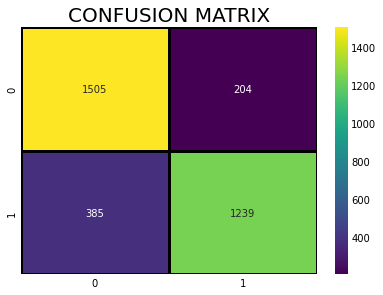

In [30]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
model(bnb,train_X,train_y,test_X,test_y)